In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [3]:
import zipfile

zip_file_path = 'bank_transactions.zip'

with zipfile.ZipFile(zip_file_path) as z:
    # Show all file names inside the zip
    print("Files in zip:", z.namelist())

    # Assuming there's only one CSV or you know the name
    csv_filename = z.namelist()[0]  # e.g., 'data.csv'

    # Read the CSV file directly without extracting to disk
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

#df=pd.read_csv("bank_transactions.csv")

Files in zip: ['bank_transactions.csv']


In [40]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [41]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [43]:
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [44]:
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [45]:
# droping null values of CustGender, CustLocation, CustomerAccountBalance,CustomerDOB
df = df.dropna(subset=['CustGender', 'CustLocation', 'CustAccountBalance','CustomerDOB'])


In [46]:
# convert object to datetime data type
from datetime import datetime
df["CustomerDOB"]=pd.to_datetime(df["CustomerDOB"])
df["TransactionDate"]=pd.to_datetime(df["TransactionDate"])


C:\Users\saksh\AppData\Local\Temp\ipykernel_9624\2606171309.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["CustomerDOB"]=pd.to_datetime(df["CustomerDOB"])
C:\Users\saksh\AppData\Local\Temp\ipykernel_9624\2606171309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CustomerDOB"]=pd.to_datetime(df["CustomerDOB"])
C:\Users\saksh\AppData\Local\Temp\ipykernel_9624\2606171309.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["TransactionDate"]=pd.to_datetime

In [49]:
df.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime                     int64
TransactionAmount (INR)           float64
Age                                 Int64
dtype: object

In [50]:
#handling DOB converting it into age 
# age column adding
# if 'CustomerDOB' in df.columns:
#     reference_date = pd.to_datetime('2016-12-31')  # Based on TransactionDate range
df['Age'] = (df["TransactionDate"] - pd.to_datetime(df['CustomerDOB'])).dt.days // 365
df['Age'] = df['Age'].apply(lambda x: x if 0 <= x <= 100 else np.nan)
df.loc[:, 'Age'] = df['Age'].astype('Int64')

C:\Users\saksh\AppData\Local\Temp\ipykernel_9624\2925014767.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = (df["TransactionDate"] - pd.to_datetime(df['CustomerDOB'])).dt.days // 365
C:\Users\saksh\AppData\Local\Temp\ipykernel_9624\2925014767.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].apply(lambda x: x if 0 <= x <= 100 else np.nan)
C:\Users\saksh\AppData\Local\Temp\ipykernel_9624\2925014767.py:7: FutureWarning: Setting an item of incompatible dtype is deprecate

In [51]:
# handling null values of age column by imputing 
df["Age"]=df["Age"].fillna(df["Age"].median())

C:\Users\saksh\AppData\Local\Temp\ipykernel_9624\1045774797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"]=df["Age"].fillna(df["Age"].median())


In [52]:
# droping DOB 
df.drop(columns=["CustomerDOB"],inplace=True)

C:\Users\saksh\AppData\Local\Temp\ipykernel_9624\3464156737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["CustomerDOB"],inplace=True)


In [53]:
df.drop(columns=["TransactionTime"],inplace=True)

C:\Users\saksh\AppData\Local\Temp\ipykernel_9624\2976366814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["TransactionTime"],inplace=True)


In [54]:
df

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),Age
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,21
1,T2,C2142763,M,JHAJJAR,2270.69,2016-02-08,27999.0,28
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,459.0,19
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,2060.0,28
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,1762.5,27
...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,M,NEW DELHI,7635.19,2016-09-18,799.0,26
1048563,T1048564,C6459278,M,NASHIK,27311.42,2016-09-18,460.0,24
1048564,T1048565,C6412354,M,HYDERABAD,221757.06,2016-09-18,770.0,27
1048565,T1048566,C6420483,M,VISAKHAPATNAM,10117.87,2016-09-18,1000.0,38


In [55]:
df.dtypes

TransactionID                      object
CustomerID                         object
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionAmount (INR)           float64
Age                                 Int64
dtype: object

In [56]:
df.CustomerID.value_counts()


CustomerID
C5533885    6
C6624352    6
C4327447    6
C6222360    6
C4021562    6
           ..
C9016563    1
C3319123    1
C7411577    1
C6210667    1
C2142763    1
Name: count, Length: 879358, dtype: int64

In [57]:
df.CustGender.value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

In [58]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)

C:\Users\saksh\AppData\Local\Temp\ipykernel_9624\1954362904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['CustGender']=='T'].index,inplace=True)


In [59]:
# adding recency 
df["t1"]=df["TransactionDate"]
df["t2"]=df["TransactionDate"]

C:\Users\saksh\AppData\Local\Temp\ipykernel_9624\3235103075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["t1"]=df["TransactionDate"]
C:\Users\saksh\AppData\Local\Temp\ipykernel_9624\3235103075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["t2"]=df["TransactionDate"]


In [60]:
rmf_df=df.groupby("CustomerID").agg({
                                        "TransactionID" : "count",
                                        "CustGender" : "first",
                                        "CustLocation":"first",
                                        "CustAccountBalance"  : "mean",
                                        "TransactionAmount (INR)" : "mean",
                                        "Age" : "max",
                                        "t1":"max",
                                        "t2":"min"
                        })

In [61]:
rmf_df = rmf_df.reset_index()
rmf_df["recency"]=((rmf_df["t1"]-rmf_df["t2"]).dt.days).astype('Int64')
rmf_df


,CustomerID,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,t1,t2,recency
0,C1010011,2,F,NOIDA,76340.635,2553.0,33,2016-09-26,2016-09-08,18
1,C1010012,1,M,MUMBAI,24204.490,1499.0,22,2016-08-14,2016-08-14,0
2,C1010014,2,F,MUMBAI,100112.950,727.5,31,2016-07-08,2016-01-08,182
3,C1010018,1,F,CHAMPARAN,496.180,30.0,26,2016-09-15,2016-09-15,0
4,C1010024,1,M,KOLKATA,87058.650,5000.0,28,2016-08-18,2016-08-18,0
...,...,...,...,...,...,...,...,...,...,...
879352,C9099836,1,M,BHIWANDI,133067.230,691.0,25,2016-07-08,2016-07-08,0
879353,C9099877,1,M,BANGALORE,96063.460,222.0,20,2016-09-15,2016-09-15,0
879354,C9099919,1,M,GUNTUR,5559.750,126.0,22,2016-08-18,2016-08-18,0
879355,C9099941,1,M,CHENNAI,35295.920,50.0,21,2016-08-28,2016-08-28,0


In [62]:
rmf_df.drop(columns=["CustomerID","t1","t2"],inplace=True)
rmf_df

,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,recency
0,2,F,NOIDA,76340.635,2553.0,33,18
1,1,M,MUMBAI,24204.490,1499.0,22,0
2,2,F,MUMBAI,100112.950,727.5,31,182
3,1,F,CHAMPARAN,496.180,30.0,26,0
4,1,M,KOLKATA,87058.650,5000.0,28,0
...,...,...,...,...,...,...,...
879352,1,M,BHIWANDI,133067.230,691.0,25,0
879353,1,M,BANGALORE,96063.460,222.0,20,0
879354,1,M,GUNTUR,5559.750,126.0,22,0
879355,1,M,CHENNAI,35295.920,50.0,21,0


In [63]:
rmf_df.rename(columns={"TransactionID":"Frequency"},inplace=True)


In [64]:
#  calaculate the outliers for each feature
lower=[]
upper=[]
num=[]
precent=[]
cols=rmf_df.drop(columns=["CustGender",	"CustLocation"]).columns
for i in cols:
    q1=rmf_df[i].quantile(0.25)
    q2=rmf_df[i].quantile(0.5)
    q3=rmf_df[i].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    upp=q3+1.5*iqr
    # calculate number of outliers
    out=rmf_df[(rmf_df[i]<low )| (rmf_df[i]>upp)].shape[0]
    # calculate percentage of outliers
    perc=(out/rmf_df[i].shape[0])*100
    # appending the values into the lists
    lower.append(low)
    upper.append(upp)
    num.append(out)
    precent.append(round(perc,3))
dt={'lower_val': lower, 'upper_val': upper, 'outlier_count': num, 'Perc%':precent }
outlier_dt=pd.DataFrame(dt,index=['Frequency', 'CustAccountBalance','TransactionAmount_(INR)', 'CustomerAge','recency'])
outlier_dt    


,lower_val,upper_val,outlier_count,Perc%
Frequency,1.000,1.000,141961,16.144
CustAccountBalance,-78334.780,145468.020,116569,13.256
TransactionAmount_(INR),-1384.325,2816.195,91776,10.437
CustomerAge,14.500,42.500,383,0.044
recency,0.000,0.000,139484,15.862


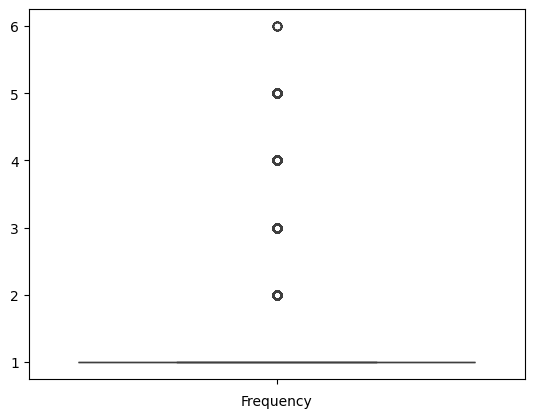

In [65]:
sns.boxplot(rmf_df["Frequency"])
plt.xlabel("Frequency")
plt.ylabel("")
plt.show()

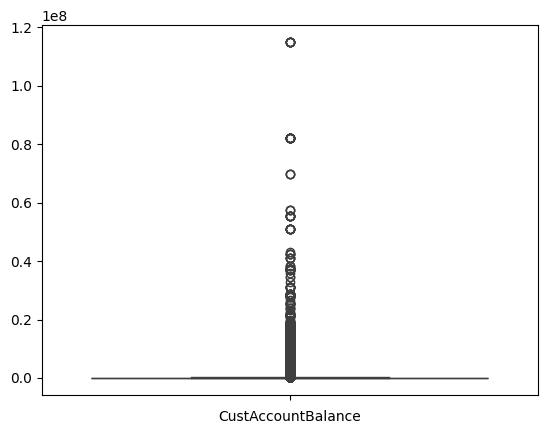

In [66]:
sns.boxplot(rmf_df["CustAccountBalance"])
plt.xlabel("CustAccountBalance")
plt.ylabel("")
plt.show()

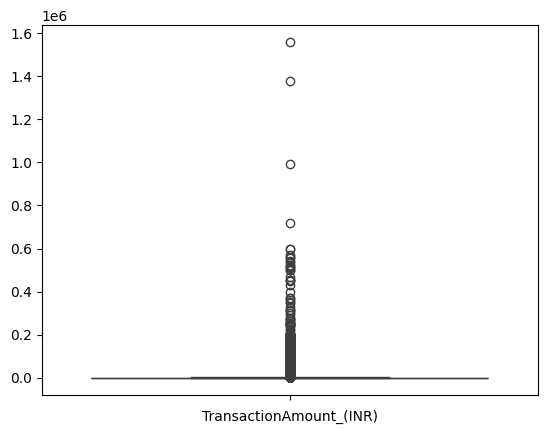

In [67]:
sns.boxplot(rmf_df["TransactionAmount (INR)"])
plt.xlabel("TransactionAmount_(INR)")
plt.ylabel("")
plt.show()

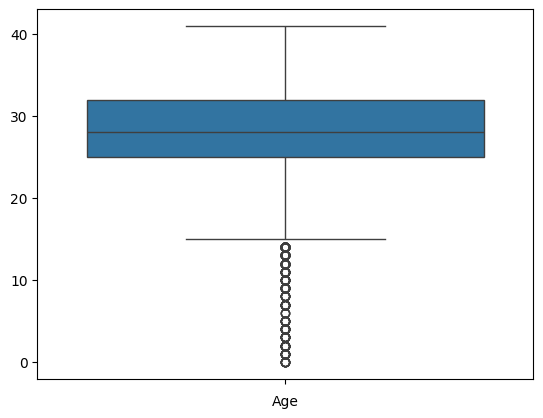

In [68]:
sns.boxplot(rmf_df["Age"])
plt.xlabel("Age")
plt.ylabel("")
plt.show()

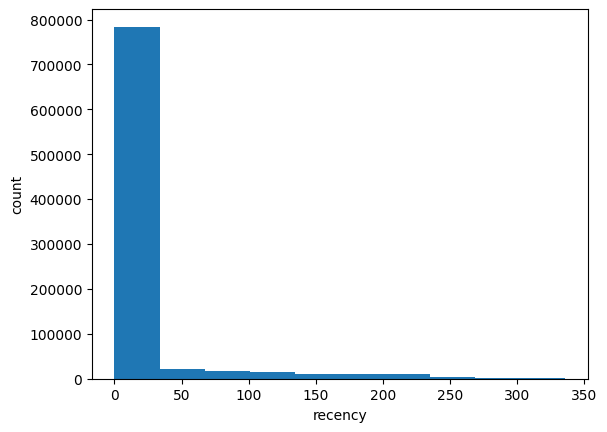

In [69]:
#univariate analysis 
# count of transaction date 
plt.hist(rmf_df["recency"])
plt.xlabel('recency')
plt.ylabel('count')
plt.show()
              

Text(0, 0.5, 'Number of Transactions')

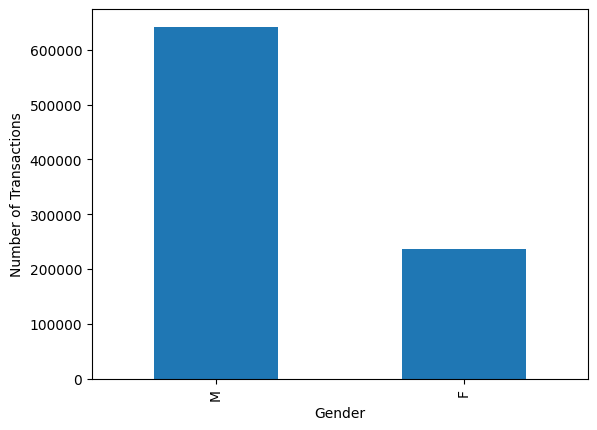

In [70]:
rmf_df["CustGender"].value_counts().plot(kind="bar")
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')


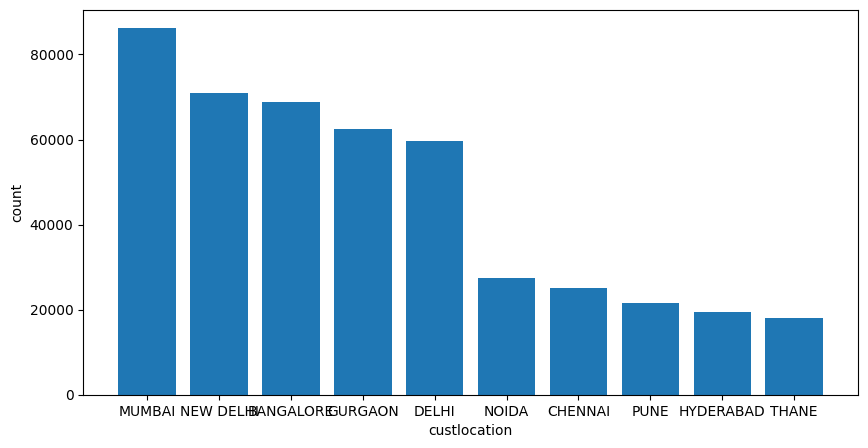

In [71]:
# top 10 cities transaction count
dic={}
for i in rmf_df["CustLocation"]:
    if i in dic:
        dic[i]+=1
    else:
        dic[i]=1 
dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))
locations = list(dic.keys())
locations=locations[:10]
counts = list(dic.values())
counts=counts[0:10]
plt.figure(figsize=(10, 5))
plt.bar(locations,counts)
plt.xlabel("custlocation")
plt.ylabel("count")
plt.show()

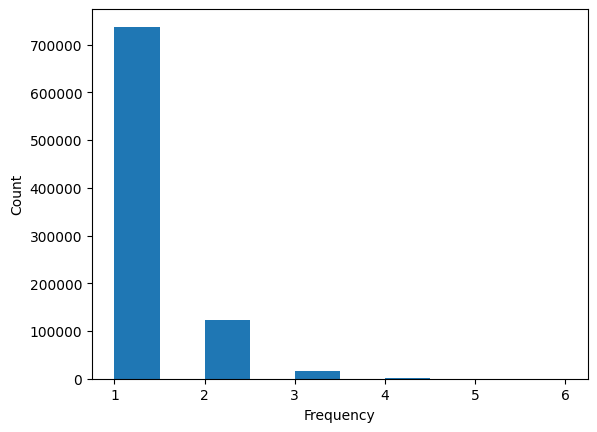

In [72]:
plt.hist(rmf_df["Frequency"])
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()
              

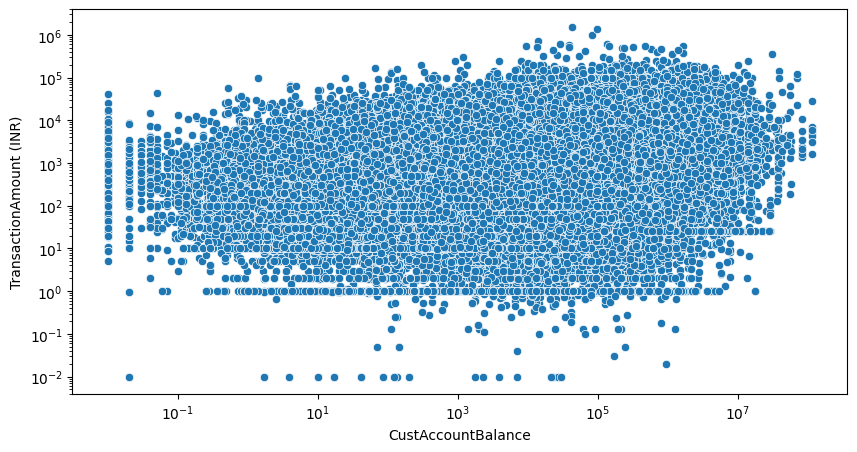

In [73]:
# bivariate  analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(x=rmf_df["CustAccountBalance"]	,y=rmf_df["TransactionAmount (INR)"])
plt.xscale('log')
plt.yscale('log')

<Axes: >

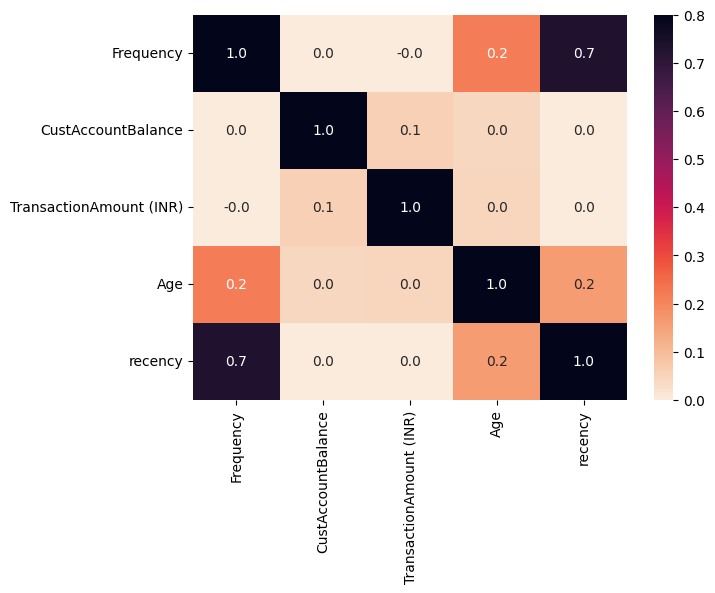

In [74]:
plt.figure(figsize=(7,5))
correlation=rmf_df.drop(columns=["CustGender","CustLocation"]).corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='rocket_r',
    annot=True,
    fmt='.1f',
    linecolor='white',
    cbar=True)


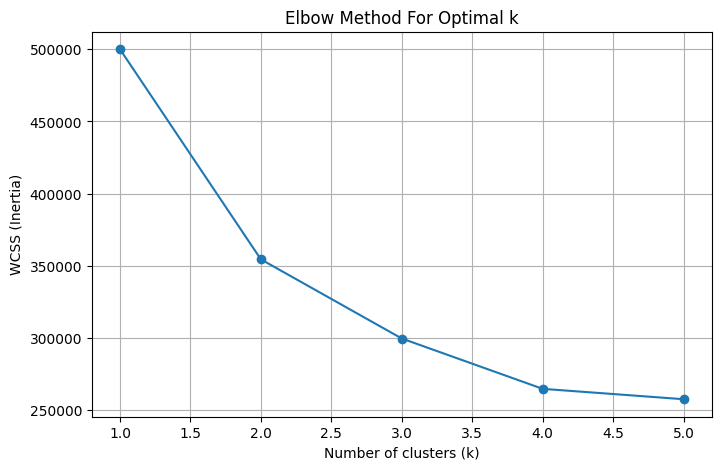

In [83]:
#Select numerical columns
features = rmf_df[["Frequency", "CustAccountBalance", "TransactionAmount (INR)", "Age","recency"]]
# reduce the sample size 
features=features.sample(n=100000,random_state=42)
# Normalize/scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Elbow method to find optimal number of clusters
wcss = []
K_range = range(1, 6)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs number of clusters
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [84]:
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f"For k={k}, Silhouette Score = {score:.3f}")


For k=2, Silhouette Score = 0.580
For k=3, Silhouette Score = 0.456
For k=4, Silhouette Score = 0.483
For k=5, Silhouette Score = 0.484


In [86]:
# Apply clustering K_means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
# Add cluster labels
features["Cluster"] = clusters

In [87]:
features

,Frequency,CustAccountBalance,TransactionAmount (INR),Age,recency,Cluster
758190,1,688.440,175.000,30,0,0
720682,1,603525.340,965.000,33,0,0
463190,2,575873.795,1460.455,37,14,1
631662,1,53357.350,857.000,27,0,0
663324,1,39510.780,499.000,25,0,0
...,...,...,...,...,...,...
851418,1,14888.310,110.000,25,0,0
549566,1,145487.840,1176.000,28,0,0
495844,2,33480.950,324.000,34,170,1
845395,1,1545.940,60.000,20,0,0


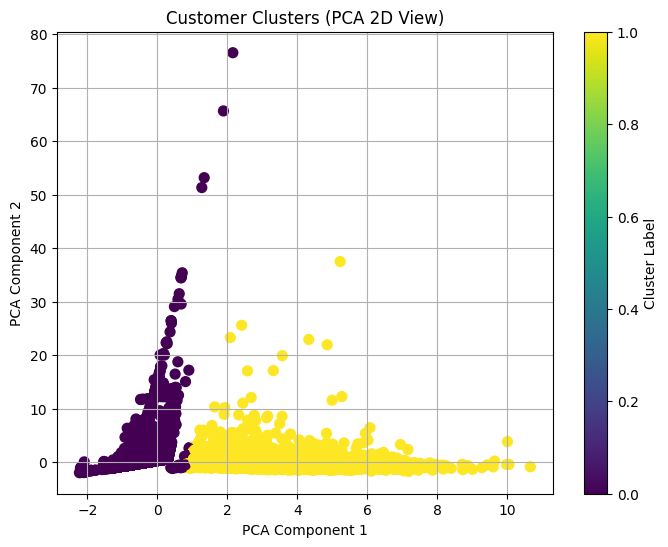

In [88]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Customer Clusters (PCA 2D View)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


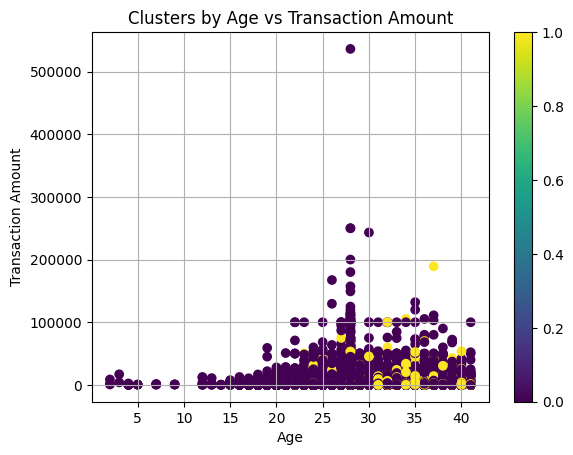

In [91]:
plt.scatter(features['Age'], features['TransactionAmount (INR)'], c=features['Cluster'], cmap='viridis')
plt.xlabel("Age")
plt.ylabel("Transaction Amount")
plt.title("Clusters by Age vs Transaction Amount")
plt.colorbar()
plt.grid(True)
plt.show()


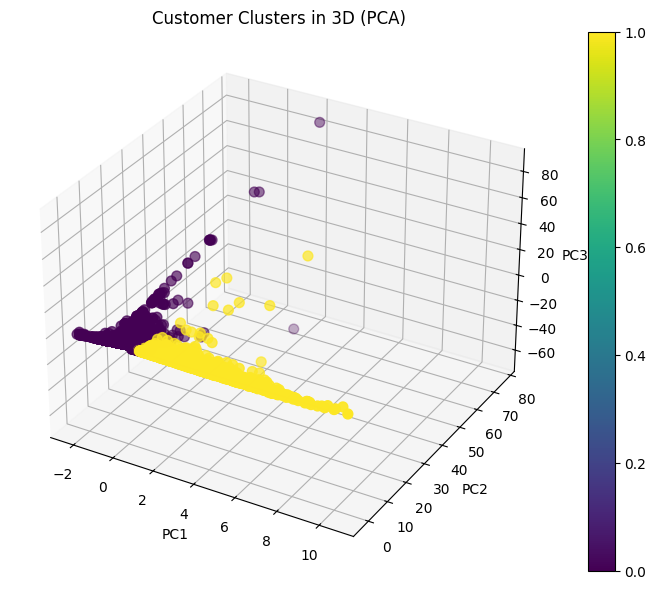

In [92]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
pca_result = pca_3d.fit_transform(scaled_features)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
                     c=clusters, cmap='viridis', s=50)
ax.set_title("Customer Clusters in 3D (PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
fig.colorbar(scatter)
plt.show()
